## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how ='outer')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = merged_df["Mouse ID"].count()
number_of_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse= merged_df.loc[merged_df.duplicated( subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].count()
clean_mice_count


1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [8]:
regimen_list= clean_df["Drug Regimen"].unique()
print(f'The Drug regimen list is: {regimen_list}')

drug_regimen_df = clean_df.groupby(["Drug Regimen"])

The Drug regimen list is: ['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [9]:
regimen_mean = round(drug_regimen_df["Tumor Volume (mm3)"].mean(),2)
regimen_median = round(drug_regimen_df["Tumor Volume (mm3)"].median(),2)
regimen_variance = round(drug_regimen_df.var()["Tumor Volume (mm3)"],2)
regimen_std_deviaton = round(drug_regimen_df.std()["Tumor Volume (mm3)"],2)
regimen_sem = round(drug_regimen_df.sem()["Tumor Volume (mm3)"],2)

regimen_summary = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Std. Dev.": regimen_std_deviaton, "SEM": regimen_sem})
regimen_summary.index = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
regimen_summary

,Mean,Median,Variance,Std. Dev.,SEM
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = round(drug_regimen_df.agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']}),2)
agg_summary

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [11]:
mice_drug_count= clean_df["Drug Regimen"].value_counts()

In [12]:
drugs_index= ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']
mice_drug_counts_index=[230, 228, 188, 186, 182, 181, 181, 178, 178, 156]

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

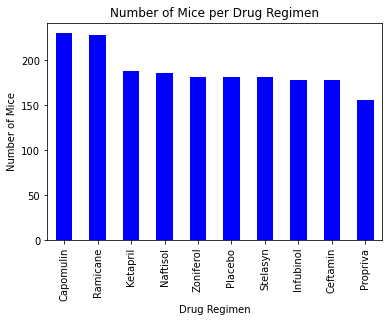

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_bar = mice_drug_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

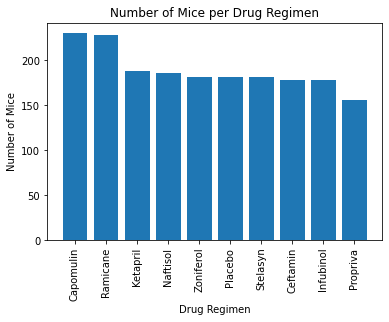

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
y_labels=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")
plt.bar(y_labels, mice_drug_count)
#make drug labels vertical so it's easily readable
plt.xticks(rotation=90)

plt.show()

Text(0.5, 1.0, 'Distribution of Male vs. Female Mice')

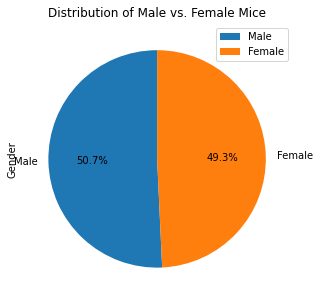

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count= clean_df["Sex"].value_counts()
#male-958, female-930
gender = [958, 930]
gender_labels= ["Male", "Female"]

gender_df= pd.DataFrame({'Gender':[958, 930]}, index=["Male", "Female"])
plot=gender_df.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, figsize=(5,5))
plt.title("Distribution of Male vs. Female Mice")


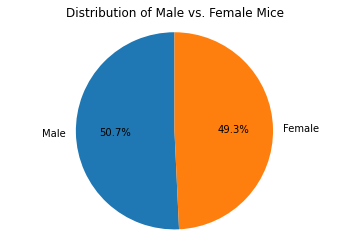

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(gender, labels=gender_labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Male vs. Female Mice")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#capomulin
capomulin_df=clean_df.loc[clean_df["Drug Regimen"]== "Capomulin",:]
capomulin_final=capomulin_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
capomulin_time= capomulin_final.loc[capomulin_final["Timepoint"]==45]

#ramicane
ramicane_df=clean_df.loc[clean_df["Drug Regimen"]== "Ramicane",:]
ramicane_final=ramicane_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
ramicane_time= ramicane_final.loc[ramicane_final["Timepoint"]==45]

#infubinol
infubinol_df=clean_df.loc[clean_df["Drug Regimen"]== "Infubinol",:]
infubinol_final=infubinol_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
infubinol_time= infubinol_final.loc[infubinol_final["Timepoint"]==45]

#ceftamin
ceftamin_df=clean_df.loc[clean_df["Drug Regimen"]== "Ceftamin",:]
ceftamin_final=ceftamin_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
ceftamin_time= ceftamin_final.loc[ceftamin_final["Timepoint"]==45]

## Line and Scatter Plots

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_drugs_df= clean_df[clean_df["Drug Regimen"].isin(final_drug_list)]
final_drugs_tumor_df = final_drugs_df.loc[final_drugs_df["Timepoint"]==45]

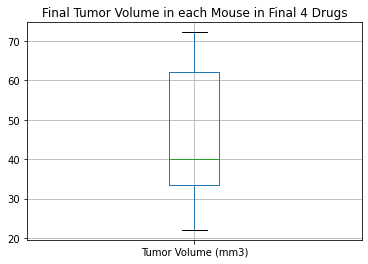

In [75]:
final_box = final_drugs_tumor_df.boxplot(column=['Tumor Volume (mm3)'])
title_boxplot = 'Final Tumor Volume in each Mouse in Final 4 Drugs'
plt.title( title_boxplot )
plt.show()

In [61]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds

In [62]:
#capomulin-----------------------------------------
cap_quartiles = round(capomulin_time["Tumor Volume (mm3)"].quantile([.25,.5,.75]),2)
cap_lower_q = cap_quartiles[.25]
cap_upper_q = cap_quartiles[.75]
cap_iqr = round((cap_upper_q - cap_lower_q),2)
cap_lower_bound = round(cap_lower_q - (1.5*cap_iqr),2)
cap_upper_bound = round(cap_upper_q - (1.5*cap_iqr),2)

print(f"The lower quartile of Capomulin is: {cap_lower_q}")
print(f"The upper quartile of Capomulin is: {cap_upper_q}")
print(f"The IQR of Capomulin is: {cap_iqr}")
print(f"Values below {cap_lower_bound} could be outliers")
print(f"Values above {cap_upper_bound} could be outliers")

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The IQR of Capomulin is: 7.78
Values below 20.71 could be outliers
Values above 28.49 could be outliers


In [63]:
#ramicane------------------------------------------------
ram_quartiles = round(ramicane_time["Tumor Volume (mm3)"].quantile([.25,.5,.75]),2)
ram_lower_q = ram_quartiles[.25]
ram_upper_q = ram_quartiles[.75]
ram_iqr = round((ram_upper_q - ram_lower_q),2)
ram_lower_bound = round(ram_lower_q - (1.5*ram_iqr),2)
ram_upper_bound = round(ram_upper_q - (1.5*ram_iqr),2)

print(f"The lower quartile of Ramicane is: {ram_lower_q}")
print(f"The upper quartile of Ramicane is: {ram_upper_q}")
print(f"The IQR of Ramicane is: {ram_iqr}")
print(f"Values below {ram_lower_bound} could be outliers")
print(f"Values above {ram_upper_bound} could be outliers")

The lower quartile of Ramicane is: 30.98
The upper quartile of Ramicane is: 38.51
The IQR of Ramicane is: 7.53
Values below 19.69 could be outliers
Values above 27.21 could be outliers


In [64]:
#infubinol-------------------------------------------------
inf_quartiles = round(infubinol_time["Tumor Volume (mm3)"].quantile([.25,.5,.75]),2)
inf_lower_q = inf_quartiles[.25]
inf_upper_q = inf_quartiles[.75]
inf_iqr = round((inf_upper_q - inf_lower_q),2)
inf_lower_bound = round(inf_lower_q - (1.5*inf_iqr),2)
inf_upper_bound = round(inf_upper_q - (1.5*inf_iqr),2)

print(f"The lower quartile of Infubinol is: {inf_lower_q}")
print(f"The upper quartile of Infubinol is: {inf_upper_q}")
print(f"The IQR of Infubinol is: {inf_iqr}")
print(f"Values below {inf_lower_bound} could be outliers")
print(f"Values above {inf_upper_bound} could be outliers")

The lower quartile of Infubinol is: 62.75
The upper quartile of Infubinol is: 67.69
The IQR of Infubinol is: 4.94
Values below 55.34 could be outliers
Values above 60.28 could be outliers


In [65]:
#ceftamin-------------------------------------------------
ceft_quartiles = round(ceftamin_time["Tumor Volume (mm3)"].quantile([.25,.5,.75]),2)
ceft_lower_q = ceft_quartiles[.25]
ceft_upper_q = ceft_quartiles[.75]
ceft_iqr = round((ceft_upper_q - ceft_lower_q),2)
ceft_lower_bound = round(ceft_lower_q - (1.5*ceft_iqr),2)
ceft_upper_bound = round(ceft_upper_q - (1.5*ceft_iqr),2)

print(f"The lower quartile of Ceftamin is: {ceft_lower_q}")
print(f"The upper quartile of Ceftamin is: {ceft_upper_q}")
print(f"The IQR of Ceftamin is: {ceft_iqr}")
print(f"Values below {ceft_lower_bound} could be outliers")
print(f"Values above {ceft_upper_bound} could be outliers")

The lower quartile of Ceftamin is: 61.43
The upper quartile of Ceftamin is: 67.53
The IQR of Ceftamin is: 6.1
Values below 52.28 could be outliers
Values above 58.38 could be outliers


In [77]:
capomulin_final.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [80]:
# create df for one mouse treated with Capomulin
capomulin_r554=clean_df.loc[clean_df["Mouse ID"]== "r554",:]
capomulin_r554.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
125,r554,Capomulin,Female,8,17,0,45.000000,0
126,r554,Capomulin,Female,8,17,5,45.781746,1
127,r554,Capomulin,Female,8,17,10,39.005494,2
128,r554,Capomulin,Female,8,17,15,35.463758,2
129,r554,Capomulin,Female,8,17,20,36.015589,2


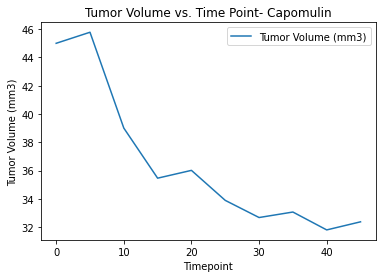

In [82]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_r554.plot(x='Timepoint',y = 'Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point- Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_x_axis =
avg_y_axis =
plt.plot(avg_x_axis,avg_y_axis)
plt.title('Avg Tumor Volume vs. Time Point- Capomulin')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
